# 1. Introduction & Core Concepts

This notebook introduces machine learning concepts using scikit-learn and the ABIDE II neuroimaging dataset.
This notebook is adapted from NeuroHackademy's workshop on machine learning by Ariel Rokem: https://neurohackademy.org/course/introduction-to-machine-learning-4/ . Everything in this notebook is straight from their notebook and slightly modified and reworded to fit the purposes of CompNeuroSociety's workshop.


## Dataset: ABIDE II

The [Autism Brain Imaging Data Exchange (ABIDE)](http://fcon_1000.projects.nitrc.org/indi/abide/) dataset contains structural brain scans from 1,004 subjects. Data includes:
- **Demographics**: age, diagnosis group (1=autism, 2=control), site
- **Brain features**: 1,440 structural features from FreeSurfer (surface area, volume, cortical thickness, local gyrification)

Data structure: $n$ samples × $p$ features matrix, where rows = subjects, columns = features.

In [30]:
# Import core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('./data/abide2.tsv', sep='\t')

print("Dataset shape:", data.shape)
data.head()

Dataset shape: (1004, 1446)


,site,subject,age,age_resid,sex,group,fsArea_L_V1_ROI,fsArea_L_MST_ROI,fsArea_L_V6_ROI,fsArea_L_V2_ROI,...,fsCT_R_p47r_ROI,fsCT_R_TGv_ROI,fsCT_R_MBelt_ROI,fsCT_R_LBelt_ROI,fsCT_R_A4_ROI,fsCT_R_STSva_ROI,fsCT_R_TE1m_ROI,fsCT_R_PI_ROI,fsCT_R_a32pr_ROI,fsCT_R_p24_ROI
0,ABIDEII-KKI_1,29293,8.893151,13.642852,2.0,1.0,2750.0,306.0,354.0,2123.0,...,3.362,2.827,2.777,2.526,3.202,3.024,3.354,2.629,2.699,3.179
1,ABIDEII-OHSU_1,28997,12.000000,16.081732,2.0,1.0,2836.0,186.0,354.0,2261.0,...,2.809,3.539,2.944,2.769,3.530,3.079,3.282,2.670,2.746,3.324
2,ABIDEII-GU_1,28845,8.390000,12.866264,1.0,2.0,3394.0,223.0,373.0,2827.0,...,2.435,3.321,2.799,2.388,3.148,3.125,3.116,2.891,2.940,3.232
3,ABIDEII-NYU_1,29210,8.300000,13.698139,1.0,1.0,3382.0,266.0,422.0,2686.0,...,3.349,3.344,2.694,3.030,3.258,2.774,3.383,2.696,3.014,3.264
4,ABIDEII-EMC_1,29894,7.772758,14.772459,2.0,2.0,3080.0,161.0,346.0,2105.0,...,2.428,2.940,2.809,2.607,3.430,2.752,2.645,3.111,3.219,4.128


## Machine Learning:
**The definition** gets kinda convoluted and complicated.

**The broad definition says that Machine Learning** seeks to build systems that learn from experience to make predictions. Key characteristics:
- Emphasis on **prediction** over explanation
    - In contrast to traditional scientific inference, where the goal is to explain/understand how a system works,
    - Though prediction and explanation are not mutually exclusive and can be used together, people usually tend to favor one or the other.
- Algorithms learn (semi-)autonomously from data (without being explicitly told how to do it)
- Algorithm evaluation focuses on objective quantitative performance

## Supervised vs. Unsupervised -- Machine Learning
**Machine Learning** can be separated into two categories of learning, *supervised* and *unsupervised*. The term 'supervised' refers to the fact that sometimes, we as humans can 'supervise' the machine to see if it is learning the correct predictions-- that is, if we have the correct outcome labels for the data.

### Examples of Supervised Learning Problems:
- Predicting, based on features X:(heart rate, weight, age), if someone will get a heart attack --> We know the true outcome label if it's historical health data. If it's not historical, we would theoretically be able to find out later whether they get a heart attack or not.
- Predicting a persons chronological age based on structural brain differences --> We know the true outcome label because we can just ask the person their age
- Predicting if an incoming call is a scam call --> users can report this information
- Predicting if someone has schizophrenia based on genetic markers --> Up for debate but in a clinical setting we'll usually know whether someone has schizophrenia or not

### Different Categories of Supervised Learning:
**Supervised learning**: Learn from labeled data (features X + labels y)
- Regression: continuous labels/y's (e.g., predicting someone's age (y) based on biological data (X) )
- Classification: discrete or categorical labels/y's (e.g., predicting whether someone has a diagnosis (y) or not based on biological data (X))

## Scikit-learn Basics

All estimators share a common interface:
1. **Initialize**: `model = Estimator()`
2. **Fit**: `model.fit(X, y)` - train on data
3. **Predict**: `model.predict(X)` - generate predictions
4. **Score**: `model.score(X, y)` - evaluate performance

## Supervised Learning: Regression vs. Classification

Let's visualize what regression and classification problems look like with simple examples.

### Regression Example
In regression, we predict continuous values. Here's a simple 2D example:

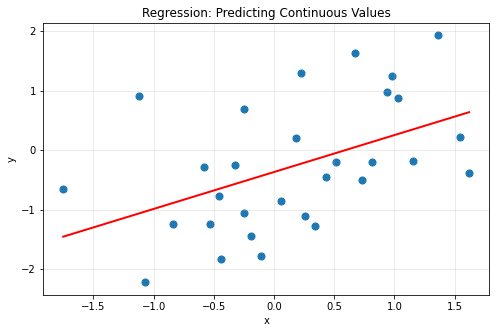

Linear equation: y = -0.37 + 0.62*x
R^2: 0.23


In [31]:
# Simple regression example
np.random.seed(100)
x = np.random.normal(size=30)
y_reg = x * 0.5 + np.random.normal(size=30)

# Fit linear regression
x_with_int = np.hstack((np.ones((len(x), 1)), x[:, None]))
w = np.linalg.lstsq(x_with_int, y_reg, rcond=None)[0]

plt.figure(figsize=(8, 5))
plt.scatter(x, y_reg, s=50)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression: Predicting Continuous Values')

# Plot best-fit line
xx = np.linspace(x.min(), x.max(), 100)
plt.plot(xx, w[0] + w[1] * xx, 'r-', linewidth=2)
plt.grid(True, alpha=0.3)
plt.show()

print(f"Linear equation: y = {w[0]:.2f} + {w[1]:.2f}*x")
print(f"R^2: {np.corrcoef(x, y_reg)[0, 1]**2:.2f}")

**^^ This linear regression is just 'finding a trend' that relates the y axis to the x axis mathematically**
- With regression, we are asking: *What is the best prediction for y given our input X?*
- Here we use a particular method to fit our model called *ordinary least squares (OLS)* which is the most common way to fit linear regression, however there are other methods as well.
- Linear Regression = the model (y = mx + b)
- Least Squares = the optimization method (minimize Σ(y_true - y_pred)²)

### Classification Examples
In classification, we predict discrete categories. Let's look at examples with different levels of difficulty.

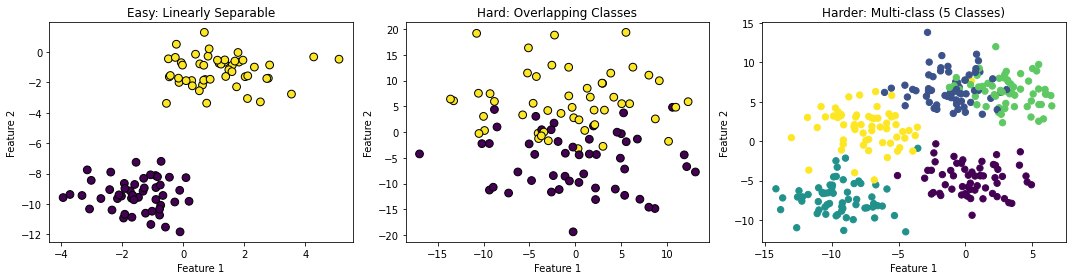

In [32]:
from sklearn.datasets import make_blobs

# Easy classification: perfectly separable classes
X_easy, y_easy = make_blobs(centers=2, random_state=2)

# Hard classification: overlapping classes
X_hard, y_hard = make_blobs(centers=2, cluster_std=6, random_state=100)

# Multi-class classification
X_multi, y_multi = make_blobs(300, centers=5, cluster_std=2, random_state=100)

# Visualize all three
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].scatter(*X_easy.T, c=y_easy, s=60, edgecolor='k', linewidth=1, cmap='viridis')
axes[0].set_title('Easy: Linearly Separable')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

axes[1].scatter(*X_hard.T, c=y_hard, s=60, edgecolor='k', linewidth=1, cmap='viridis')
axes[1].set_title('Hard: Overlapping Classes')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')

axes[2].scatter(*X_multi.T, c=y_multi, s=40, cmap='viridis')
axes[2].set_title('Harder: Multi-class (5 Classes)')
axes[2].set_xlabel('Feature 1')
axes[2].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

## Classification
- Classification problems are conceptually similar to regression problems. In classification, just like in regression, we're still trying to learn to make the best predictions we can with respect to some target set of labels. The difference is that the labels are now discrete rather than continuous. In the simplest case, the labels are binary: there are only two *classes*.

- In fact, it's entirely possible that there's *no* feasible way to perfectly discriminate between the two classes (i.e., even the best possible classifier we could train would always suffer from some degree of misclassification).

- Most real-world supervised learning problems—whether they involve regression or classification—-have far more than two features we can use to generate predictions, so the complexity of the problem is much greater than the above suggests. Moreover, classification problems aren't restricted to just two classes. For example, we could have a *multiclass* classification problem like this, where our goal is still to correctly label each point, but now there are 5 possible classes.

## Unsupervised Learning: Clustering and Dimensionality Reduction

In unsupervised learning, we don't have labels—we're looking for patterns or structure in the data itself.

### Clustering
Clustering attempts to group similar observations together without knowing the "true" labels.

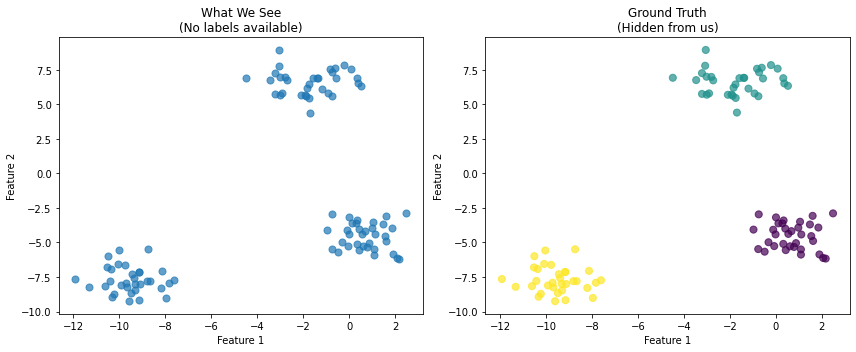

Challenge: Can we discover the groups on the left, without seeing the labels on the right?


In [33]:
# Generate data with clear clusters
X_cluster, y_true = make_blobs(random_state=100)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Left: What we see (no labels)
axes[0].scatter(*X_cluster.T, s=50, alpha=0.7)
axes[0].set_title("What We See\n(No labels available)")
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

# Right: Ground truth (for comparison)
axes[1].scatter(*X_cluster.T, c=y_true, s=50, cmap='viridis', alpha=0.7)
axes[1].set_title("Ground Truth\n(Hidden from us)")
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

print("Challenge: Can we discover the groups on the left, without seeing the labels on the right?")

## Unsupervised Learning: Clustering

In unsupervised learning, we don't have labels—we're looking for patterns in the data itself.

**Clustering** attempts to group similar observations together without knowing the "true" labels.

---

## Now Let's Apply These Concepts to Real Data!

We'll use the ABIDE II dataset to demonstrate regression, classification, and clustering with actual neuroimaging data.

In [34]:
# Prepare data: brain features as X, age as y
X_all = data.filter(like='fs')
y = data['age'].values

# Sample 5 features for demonstration
N_FEATURES = 5
X = X_all.sample(N_FEATURES, axis=1, random_state=100)

### The Scikit-learn Estimator API

All scikit-learn estimators follow the same pattern:

1. **Initialize**: Create an estimator object with desired parameters
   ```python
   model = LinearRegression()
   ```

2. **Fit**: Train the model on data (X is required, y is required for supervised learning)
   ```python
   model.fit(X, y)
   ```

3. **Predict**: Generate predictions for new (or same) data
   ```python
   y_pred = model.predict(X)
   ```

4. **Score**: Evaluate performance (optional, uses a default metric)
   ```python
   score = model.score(X, y)
   ```

This consistent API makes it easy to swap different algorithms—the workflow stays the same!

## Example 1: Regression (Predicting Age)

R² correlation score: 0.20


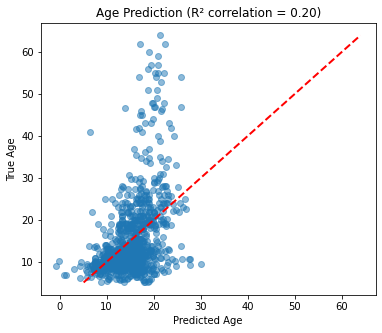

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Initialize and fit model
model = LinearRegression()
model.fit(X, y)

# Generate predictions
y_pred = model.predict(X)

# Evaluate performance
r2 = r2_score(y, y_pred)
print(f"R² correlation score: {r2:.2f}")

# Visualize predictions vs. true values
plt.figure(figsize=(6, 5))
plt.scatter(y_pred, y, alpha=0.5)
plt.xlabel('Predicted Age')
plt.ylabel('True Age')
plt.title(f'Age Prediction (R² correlation = {r2:.2f})')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.show()

### A Note on Model Parameters vs. Predictions

Once we fit our model, we *could* examine the regression coefficients, standard errors, p-values, etc. In fact, other Python packages like StatsModels provide detailed statistical summaries similar to R or SPSS.

However, **machine learning focuses on prediction, not inference**. We care more about:
- How well the model predicts new data
- Objective quantitative performance metrics
- What the model can *do*, not what's inside it

This doesn't mean we ignore everything else (interpretability, efficiency, etc. still matter), but the primary goal is predictive performance.

## Example 2: Classification (Autism Diagnosis)

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Use diagnosis group as labels
y_class = data['group']

# Initialize and fit classifier
clf = GaussianNB()
clf.fit(X_all, y_class)

# Generate predictions and evaluate
y_pred = clf.predict(X_all)
accuracy = clf.score(X_all, y_class)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_class, y_pred))

Accuracy: 0.63

Classification Report:
              precision    recall  f1-score   support

         1.0       0.63      0.44      0.52       463
         2.0       0.62      0.78      0.69       541

    accuracy                           0.63      1004
   macro avg       0.63      0.61      0.61      1004
weighted avg       0.63      0.63      0.61      1004



**Key metrics**: Accuracy shows overall correctness, but precision and recall give more detail about model performance on each class.

## **Unsupervised learning**: Find structure without labels (only features X)
- Clustering: group similar observations
- Dimensionality reduction: reduce feature space

## Example 3: Clustering (Finding Subtypes)

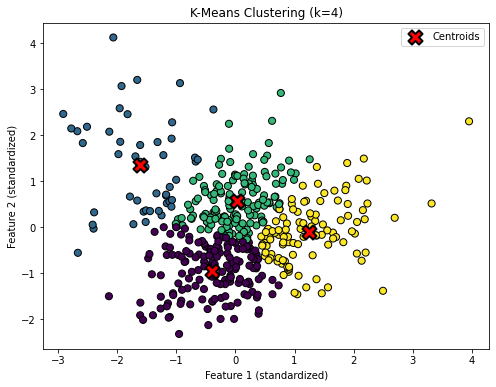

In [37]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

# Select autism subjects only
autism_mask = data['group'] == 1
X_autism = X_all[autism_mask].sample(2, axis=1, random_state=99)

# Standardize features
X_autism_scaled = scale(X_autism)

# Fit k-means with k=4 clusters
K = 4
km = KMeans(K, random_state=42)
clusters = km.fit_predict(X_autism_scaled)

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_autism_scaled[:, 0], X_autism_scaled[:, 1], 
            c=clusters, cmap='viridis', s=50, edgecolor='k')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            c='red', s=200, marker='X', edgecolor='k', linewidth=2, label='Centroids')
plt.xlabel('Feature 1 (standardized)')
plt.ylabel('Feature 2 (standardized)')
plt.title(f'K-Means Clustering (k={K})')
plt.legend()
plt.show()

## Key Takeaway: The Danger of Too Many Features

As we add more features, model performance on **training data** improves dramatically—but this can be misleading!

### ⚠️ Important Note About Our Evaluation

In all the examples above, we made a critical mistake: **we evaluated our models on the same data we used to train them**. 

This is like:
- Teaching students with a textbook, then giving them the exact same questions from that textbook on the exam
- Memorizing a recipe, then claiming you're a great cook because you can recite it

**Why is this a problem?**
- Models can "memorize" the training data without learning generalizable patterns
- Performance on training data is **always** overly optimistic
- We have no idea how well the model will work on new, unseen data

**The solution**: In the next sections, we'll learn to:
- Split data into training and testing sets
- Use cross-validation for robust evaluation
- Only report performance on data the model has never seen before

This is one of the most important concepts in machine learning!

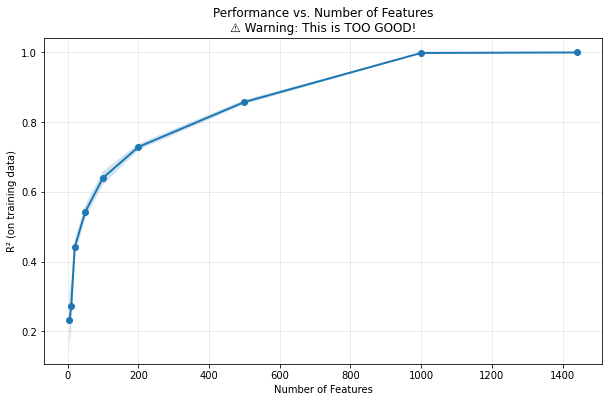

⚠️ Perfect R² = 1.0 suggests OVERFITTING!
Next: Learn how to detect and prevent overfitting.

Why is R² = 1.0 impossible for real-world data?
- Measurement error in age (birth date typos, rounding, etc.)
- Noise in brain feature extraction
- Individual variation not captured by brain structure
- Data quality issues (scan artifacts, preprocessing errors)

Our model is 'hallucinating' patterns that don't truly exist!


In [38]:
# Test performance with varying numbers of features
n_feats = [5, 10, 20, 50, 100, 200, 500, 1000, 1440]
n_iters = 10
results = np.zeros((len(n_feats), n_iters))

model = LinearRegression()

for i, n in enumerate(n_feats):
    for j in range(n_iters):
        X_sample = X_all.sample(n, axis=1)
        model.fit(X_sample, y)
        results[i, j] = model.score(X_sample, y)

# Plot results
means = results.mean(1)
stds = results.std(1)

plt.figure(figsize=(10, 6))
plt.plot(n_feats, means, linewidth=2, marker='o')
plt.fill_between(n_feats, means - stds, means + stds, alpha=0.2)
plt.xlabel("Number of Features")
plt.ylabel("R² (on training data)")
plt.title("Performance vs. Number of Features\n⚠️ Warning: This is TOO GOOD!")
plt.grid(True, alpha=0.3)
plt.show()

print("⚠️ Perfect R² = 1.0 suggests OVERFITTING!")
print("Next: Learn how to detect and prevent overfitting.")
print("\nWhy is R² = 1.0 impossible for real-world data?")
print("- Measurement error in age (birth date typos, rounding, etc.)")
print("- Noise in brain feature extraction")
print("- Individual variation not captured by brain structure")
print("- Data quality issues (scan artifacts, preprocessing errors)")
print("\nOur model is 'hallucinating' patterns that don't truly exist!")

## Understanding Overfitting

Perfect R² = 1.0 seems amazing, but it's a **major problem**! With so many features relative to samples, our model is **memorizing noise** instead of learning true patterns.

**The solution**: In the next notebooks, we'll learn about train/test splits, cross-validation, and regularization to prevent overfitting.

## The Danger of Overfitting

We've learned the basics of machine learning in scikit-learn, but there's a critical problem we need to address: **overfitting**.

Let's investigate what happens when we increase the number of features used to predict age. Intuitively, you might think: "More features = better predictions!" Let's test this assumption.